## Unsupervised

use for data transform, clustering

+ data transform : for visualization, data compression, supervised learning

+ clustering     : 

In [3]:
import sklearn; import numpy as np; import pandas as pd; import matplotlib.pyplot as plt; import mglearn
import matplotlib
matplotlib.rc('font', family='Courier New')

### pre-processing, scaler before supervised learning

+ StandardScaler : normarlize to mean = 0, var = 0.
        # (X-X.mean)/X.std

+ RobustScaler   : use median, quantile. not affected by outlier.
        # (X-q_2)/(q_3-q_1)

+ MinMaxScaler   : data transform every feature have 0~1 value.
        # (x-x.min)/(x.max-x.min)

+ QuantileTransformer : press every data to between 0~1

+ Normalizer     : normalize each row. trans to have a 1 norm size feature vector.
        # norm = [l1, l2, max], default = l2

Nan value replace method

+ SimpleImputer  : replace to feature mean or mode

+ KNNImputer     : replace to use KNN method

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(); scaler.fit(X_train)

# apply to X_train
X_train_scaled = scaler.transform(X_train)

print('transformed size:', X_train_scaled.shape)
print('feature min before trans:', X_train.min(axis=0))
print('feature max before trans:', X_train.max(axis=0))
print('feature min after trans:',X_train_scaled.min(axis=0))
print('feature max after trans:',X_train_scaled.max(axis=0))

# apply to X_test
X_test_scaled = scaler.transform(X_test)
print('feature min after trans:',X_test_scaled.min(axis=0))
print('feature max after trans:',X_test_scaled.max(axis=0))

    # must same transform to train/test set every time.
    #   >  (X_test-X_train_min)/(X_train_max-X_train_min)

transformed size: (426, 30)
feature min before trans: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
feature max before trans: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
feature min after trans: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
feature max after trans: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
feature min after trans: [ 0.0336031   0.0226581   0.03144219  0.0114103

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

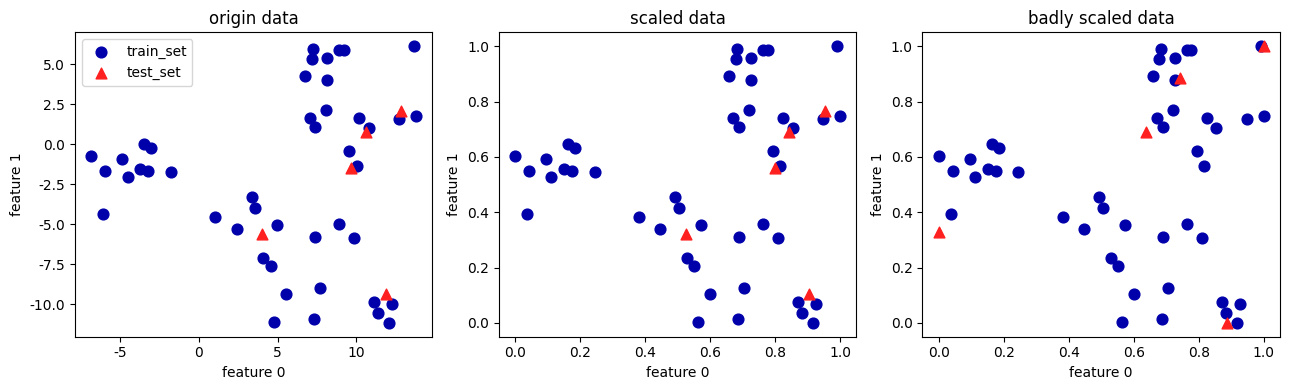

In [6]:
# when you don't use same statistics to train/test.
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="train_set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="test_set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("origin data")

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="train_set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="test_set", s=60)
axes[1].set_title("scaled data")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("badly scaled data")

for ax in axes:
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
fig.tight_layout()

In [10]:
# check the scaler's affect to SVC
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train ,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(gamma='auto')
svm.fit(X_train,y_train)
print('test set acc:', svm.score(X_test,y_test))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)

print('scaled test set acc:',svm.score(X_test_scaled,y_test))

test set acc: 0.6293706293706294
scaled test set acc: 0.951048951048951


## Dimensionality reduction, feature extraction, manifold learning

### PCA

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

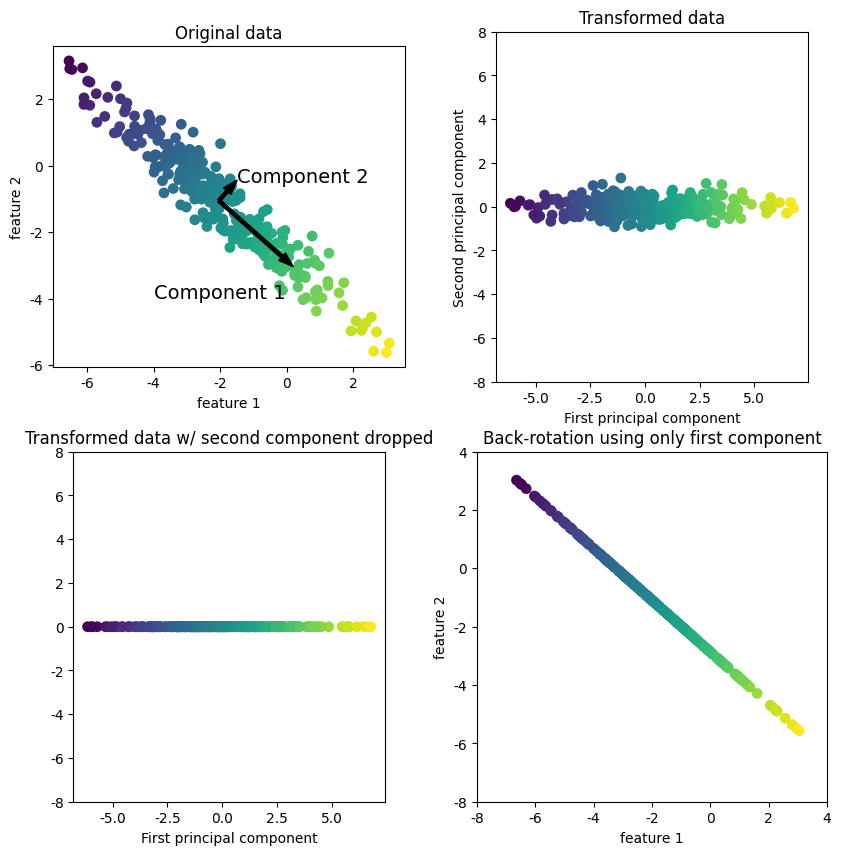

In [7]:
# PCA for dimensionality reduction
    # = 주성분 분석. 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술
    # 데이터의 분산이 가장 크고 수직인 성분을 찾는다.
mglearn.plots.plot_pca_illustration()
    # 주성분 = 데이터에 있는 주된 분산의 방향 = 데이터에서 가장 많은 정보를 담고 있는 방향 = 특성들의 상관관계가 가장 큰 방향
    #        = 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태.(특히 차원 축소시.)
    #        components_ 에 저장된다.
    #       일반적으로 원본 특성 개수만큼의 주성분이 있다.
    # 노이즈 제거, 주성분에서 유지되는 정보 시각화(고차원 데이터 시각화)에 사용.

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

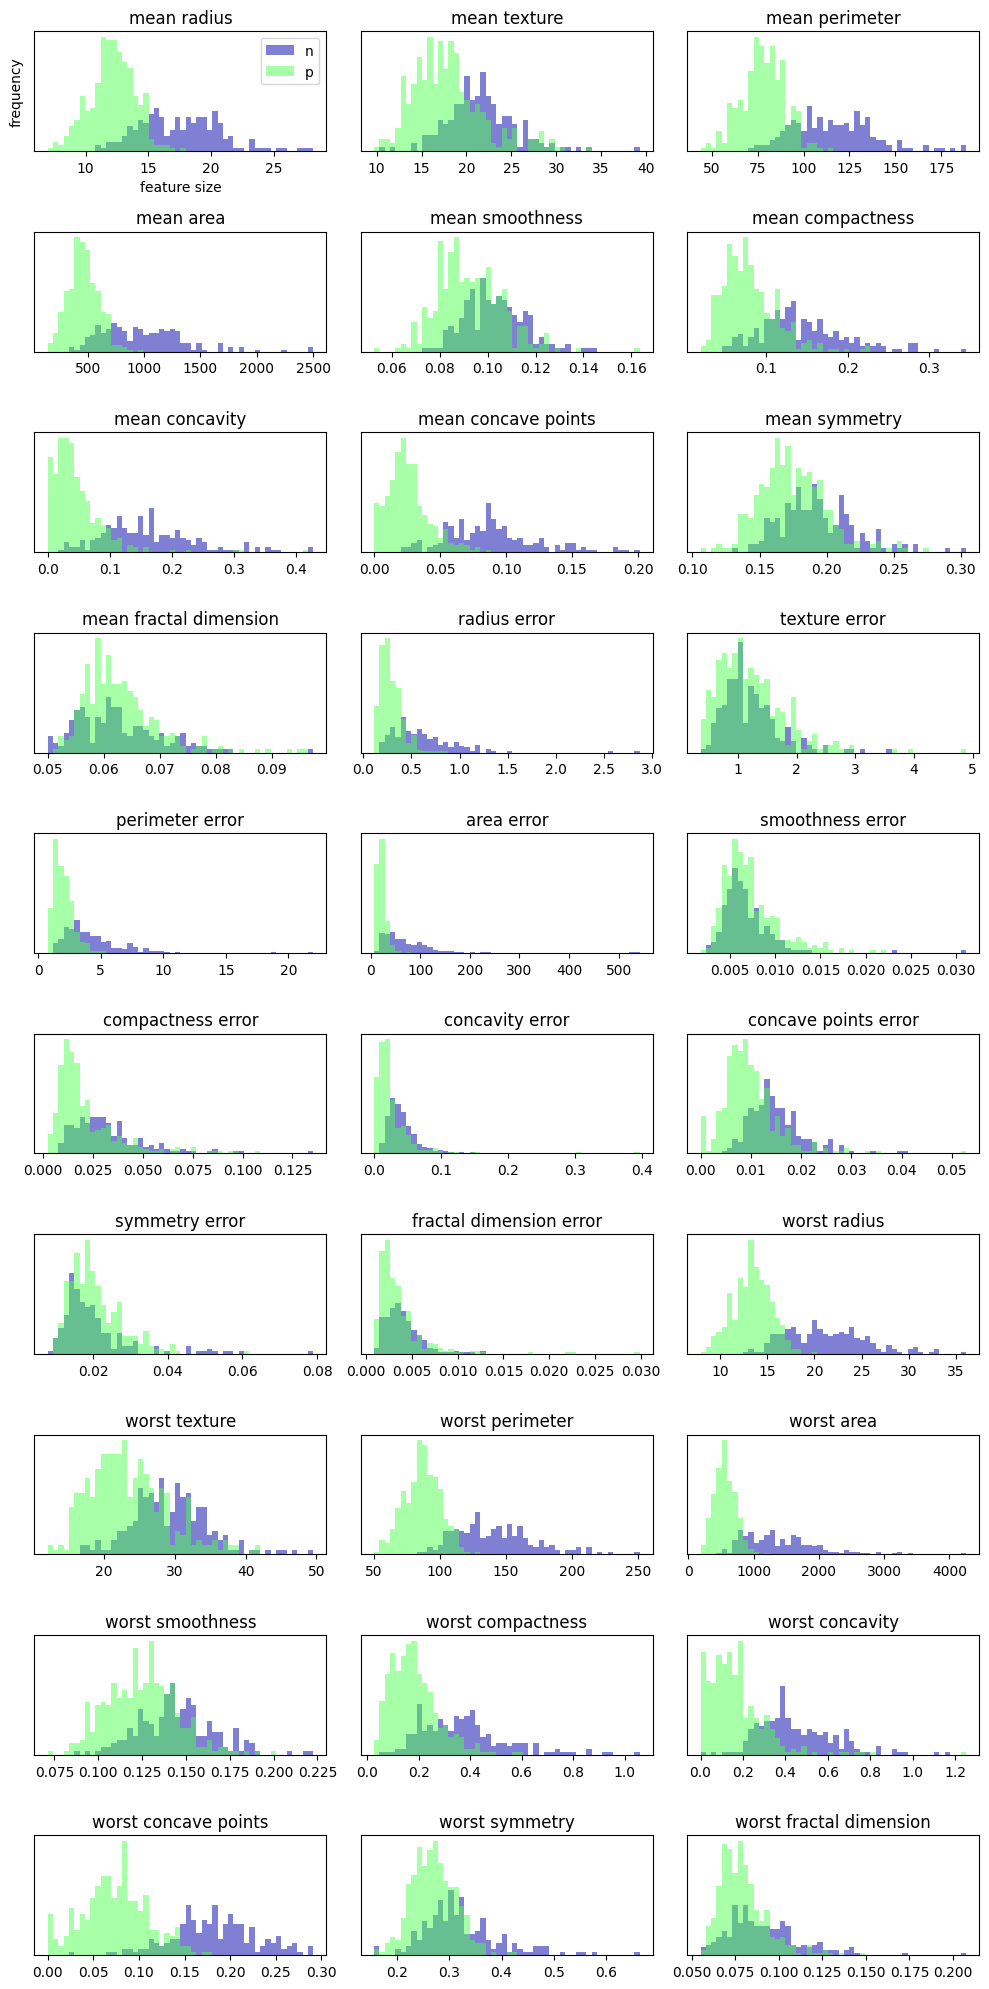

In [8]:
# visualization cancer dataset using PCA
#  PCA 사용 전에, 먼저 히스토그램을 통한 시각화를 해보자.
#  양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그리는 것이 특성이 많은 경우에는 산점도보다 더 쉽게 시각화 가능하다. 
fig, axes = plt.subplots(10, 3, figsize=(10, 20))

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("feature size")
ax[0].set_ylabel("frequency")
ax[0].legend(["n", "p"], loc="best")
fig.tight_layout()
# 특성들이 클래스별로 어떻게 분포되어있는지, 어떤 특성이 양성과 악성 샘플을 구분하는 데 더 좋은지.
    # smoothness error 같은경우는 많은 부분이 겹쳐 쓸모x, worst concave points 같은 경우는 확실히 구분되어 유용.
    # but 특성간의 상호작용이나 이 상호작용이 클래스에 미치는 영향을 전혀 알려주지 못함.
    # PCA를 사용하면 주요 상호작용을 찾을 수 있어 더 나은 시각화를 가능하게 한다.

origin data shape: (569, 30)
PCA data shape: (569, 2)


Text(0, 0.5, 'second principal component')

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

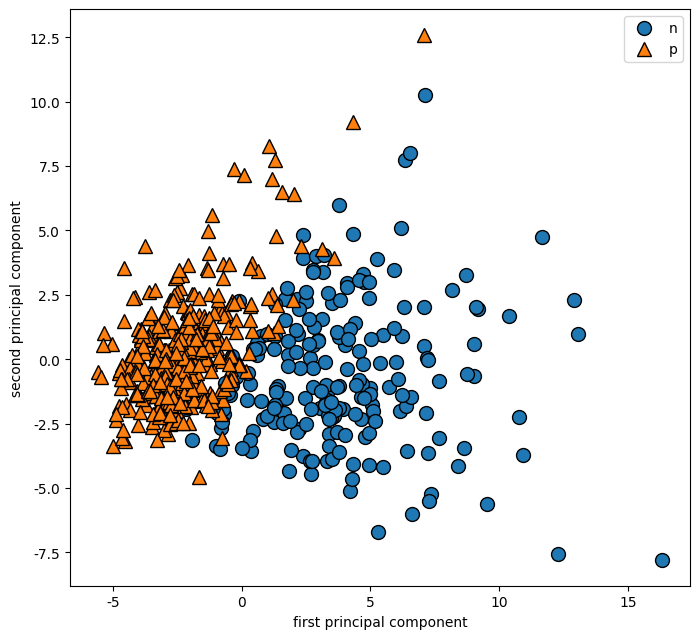

In [9]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print('origin data shape:',cancer.data.shape)
print('PCA data shape:',X_pca.shape)

plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(['n','p'],loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('first principal component')
plt.ylabel('second principal component')

PCA principal components shape: (2, 30)
PCA principal components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'principal component')

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

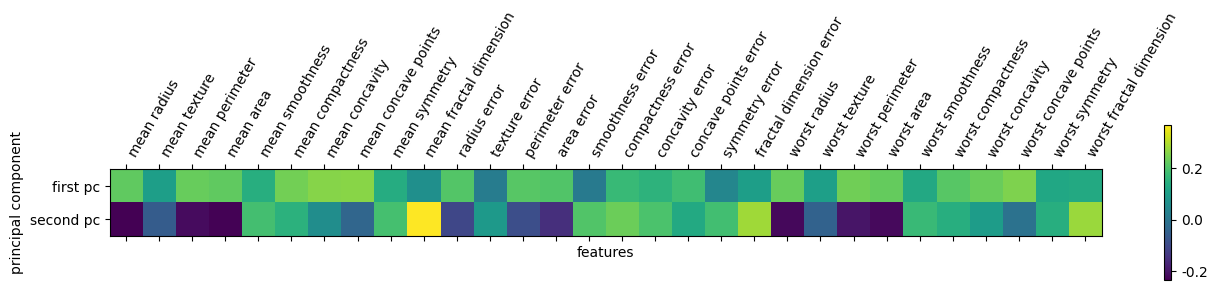

In [10]:
print('PCA principal components shape:', pca.components_.shape)
print('PCA principal components:\n', pca.components_)
    # 2행으로 나눠져 있으며 첫 행부터 중요도 순으로 나열. > 첫 행 = 첫 주성분

# 이를 visualization to heatmap
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['first pc', 'second pc'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60, ha='left')
plt.xlabel('features'); plt.ylabel('principal component')
    # 첫 주성분의 모든 특성은 부호가 같다. > 모든 특성 사이에 공통의 상호관계가 있다.
    # 두 번째 주성분은 부호가 섞여 있으며 30개 특성을 갖기에 의미를 설명하기 쉽지않다.

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

people.images.shape: (3023, 87, 65)
class num: 62
Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemi

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.


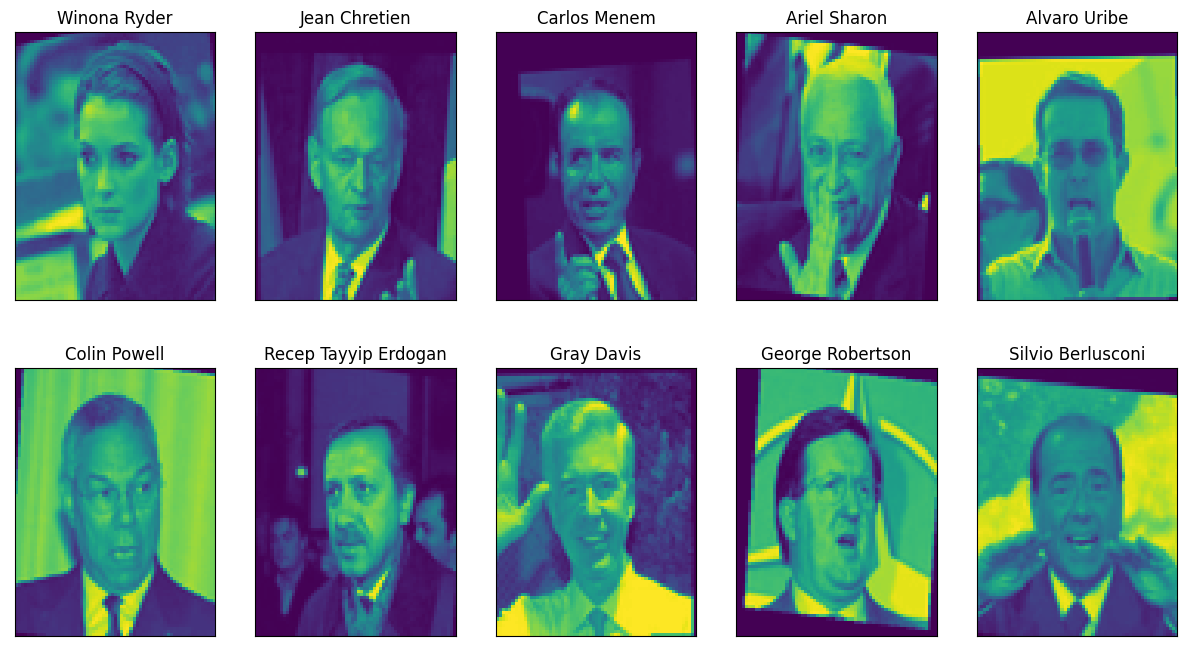

In [38]:
# PCA for feature extraction
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) # default : color = False
img_shape = people.images[0].shape

fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
            # subplot_kw = apply to every subplot
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

print('people.images.shape:',people.images.shape)
    # img size = 87*65 px
print('class num:',len(people.target_names))

counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name,count),end='  ')
    if (i+1)%3 == 0:
        print()
    # 조지 부시와 콜린 파월 이미지가 많음(편향)

1-knn test set acc: 0.13953488372093023
pca test set acc: 0.1511627906976744


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

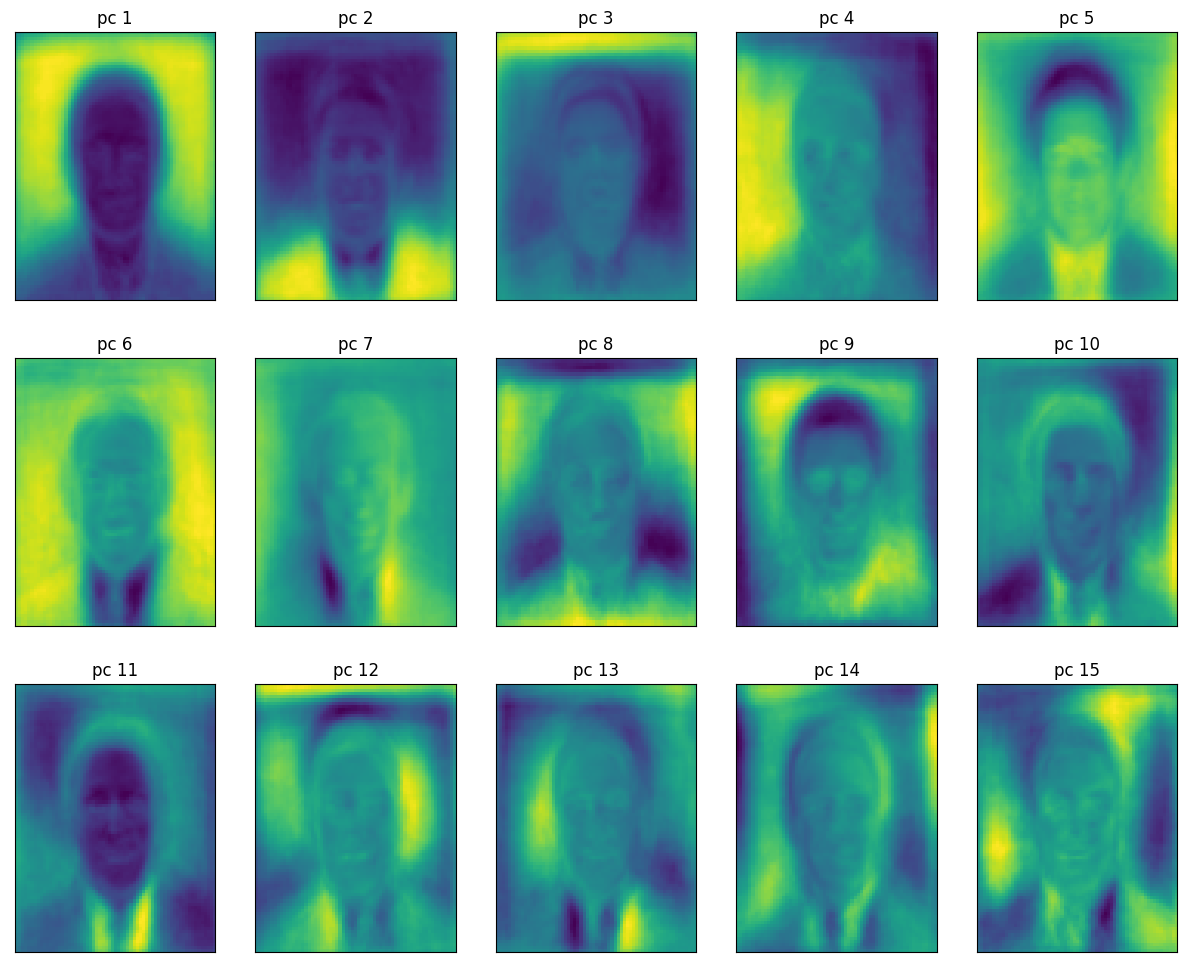

In [40]:
# 50 img per one person to decrease bias
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
        # [return index]

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255.
    # same with MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people,stratify=y_people, random_state=0)

# non pca acc
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn.fit(X_train,y_train)
print('1-knn test set acc:',knn.score(X_test, y_test))
    # 0.13... trash.

# pca_whitening acc
from sklearn.decomposition import PCA
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
knn.fit(X_train_pca,y_train)
print('pca test set acc:',knn.score(X_test_pca,y_test))

fig, axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})

for i, (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(img_shape),cmap='viridis')
    ax.set_title('pc {}'.format(i+1))


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

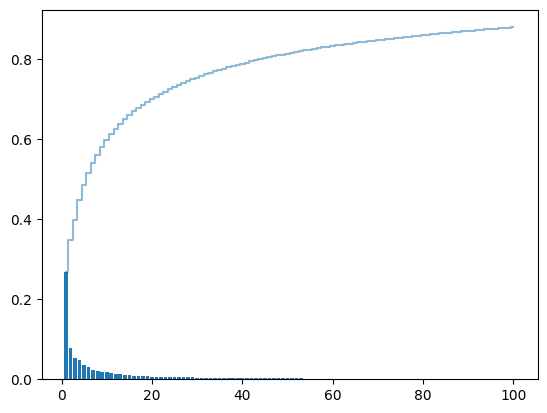

In [41]:
# explained_varience_ratio : 설명된 분산의 비율. = 각 주성분이 얼만큼의 분산을 표현하는지.
plt.bar(range(1,101),pca.explained_variance_ratio_,align='center',label='explained_varience')
plt.step(range(1,101),np.cumsum(pca.explained_variance_ratio_),alpha=.5,where='mid',label='cumsum of explained varience')
plt.show()
# 대략 30번째 주성분 이후에는 큰 변화를 기대하기 어렵다.

### NMF - non-negative matrix factorization(비음수 행렬 분해)
use for Dimensionality reduction, feature extraction

pca와 비슷한 알고리즘을 갖는다. 대신 음수가 아닌 성분과 계수를 찾는다. 

    # 음수 미포함 성분 = 원점 (0,0)에서 데이터로 가능 방향을 추출한 것

    # pca보다 얼굴 분류에서 성능이 떨어진다. = 데이터 인코딩과 재구성 보다는 유용한 패턴 찾기에 활용.

     음수가 아닌 특성을 가진 데이터만 사용가능 : 오디오 트랙, 음악같이 독립된 소스를 덮어써서 만들어진 데이터에 유용.
     섞여 있는 데이터에서 원본 성분을 구분할 수 있다.

c:\Users\rjsgh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not foun

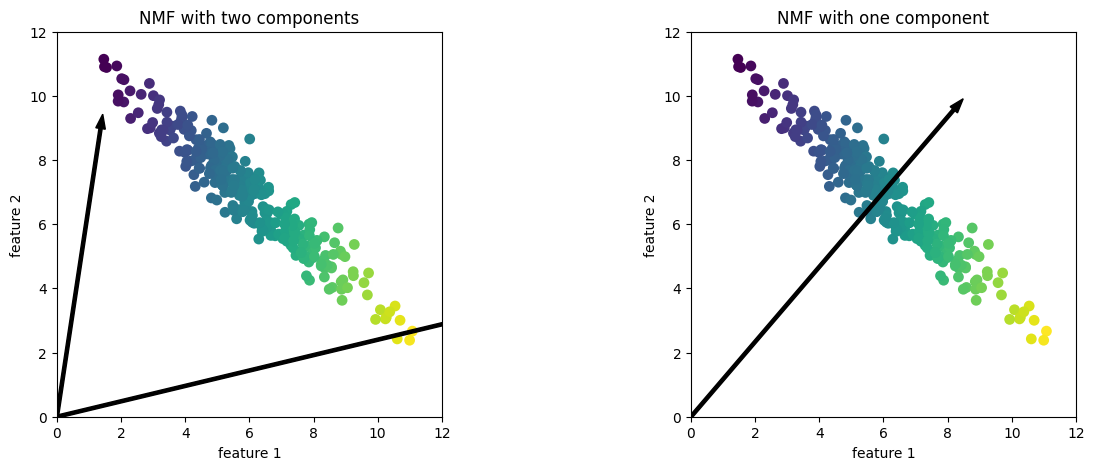

In [24]:
mglearn.plots.plot_nmf_illustration()

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

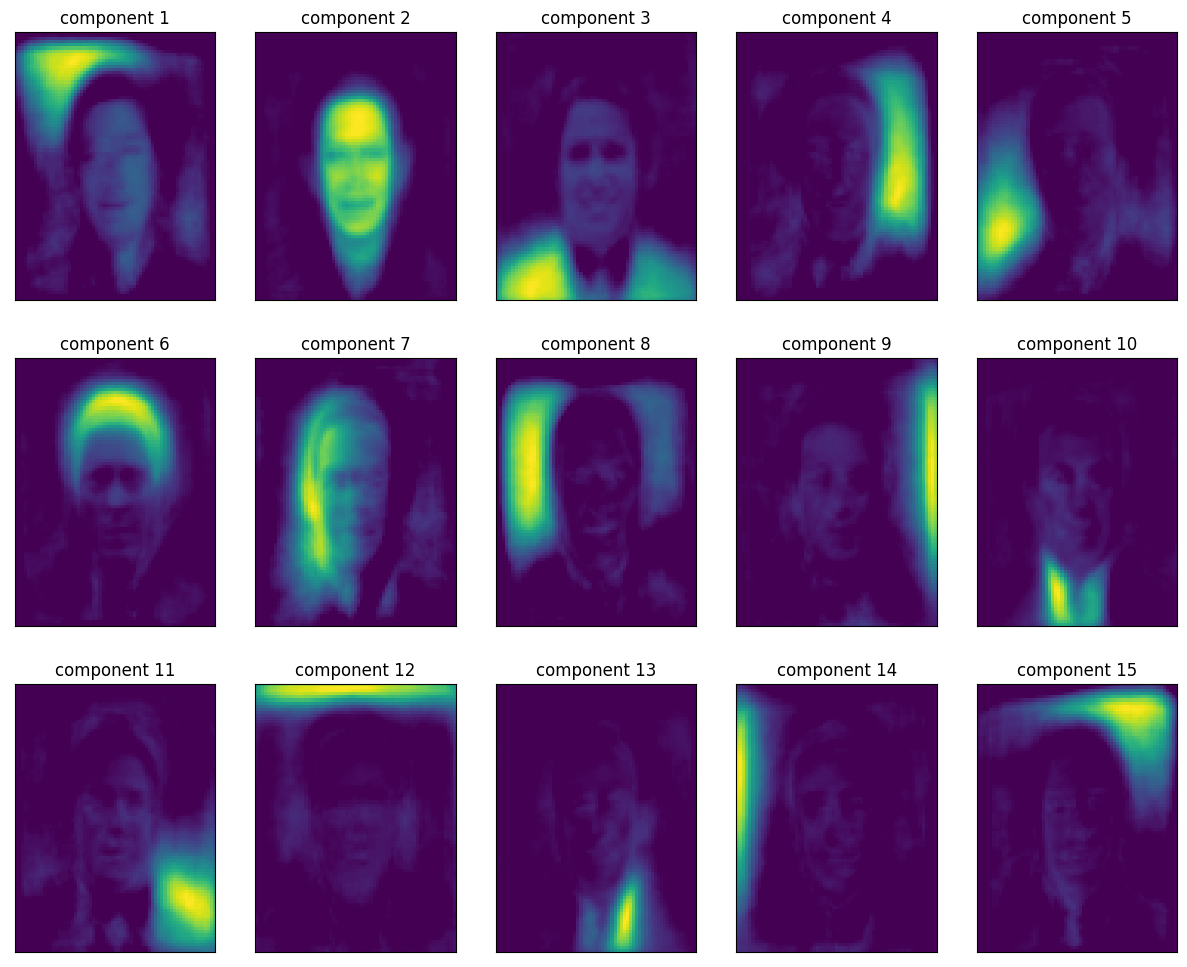

In [26]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15,init='nndsvd',random_state=0,max_iter=1000,tol=1e-2)
                            # optim way
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(img_shape))
    ax.set_title('component {}'.format(i+1))
# 음수값이 없기에 훨씬 얼굴 원형처럼 보인다.

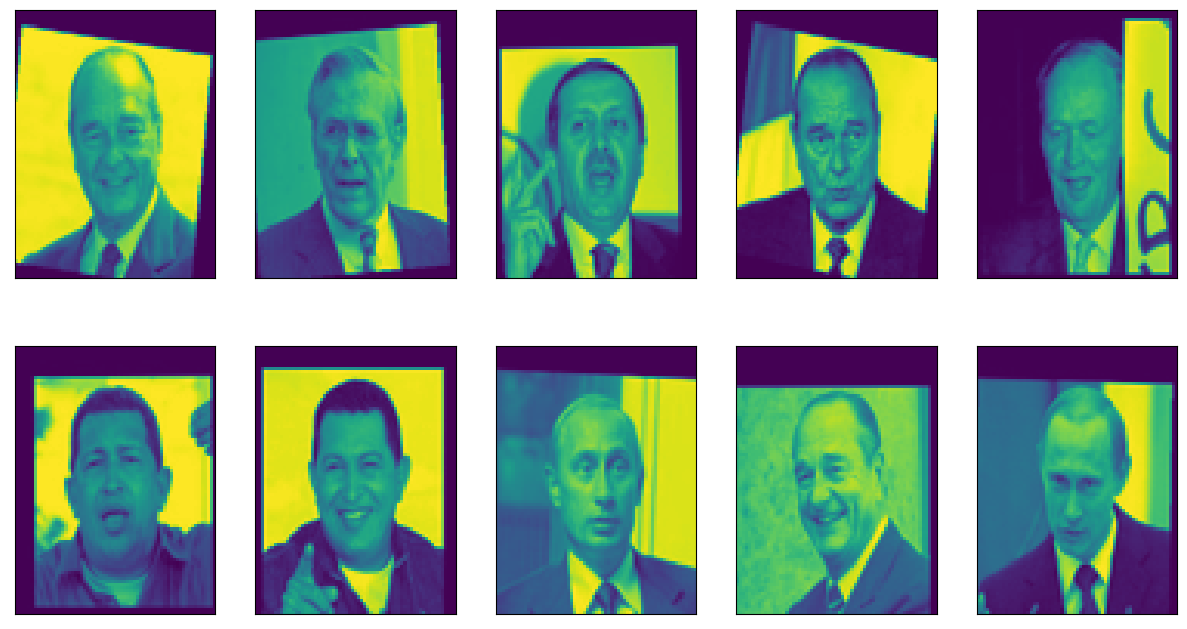

In [55]:
components = 3 # component 4로 정렬하여 처음 10개 img 출력
indexs = np.argsort(X_train_nmf[:,components])[::-1]
                # 크기 인덱스 반환(argsort) 및 인버스.([::-1])
fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for i, (ind,ax) in enumerate(zip(indexs,axes.ravel())):
    ax.imshow(X_train[ind].reshape(img_shape))
    # 성분 4의 계수가 큰 얼굴들.

Text(0, 0.5, 'signal')

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

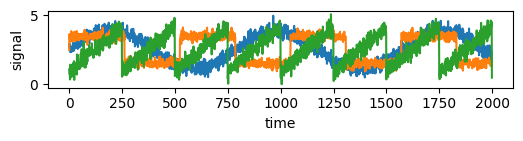

In [56]:
# complex signal datasets for nmf
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel('time'); plt.ylabel('signal')


In [61]:
A= np.random.RandomState(0).uniform(size=(100,3))


(2000, 3)

### t-SNE : Manifold learning

시각화를 위한 알고리즘. > 3개 이상의 특성을 뽑는 경우는 거의 없다.

테스트 세트에는 적용할 수 없고, 단지 훈련했던 데이터만 변환할 수 있다.

데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는다.

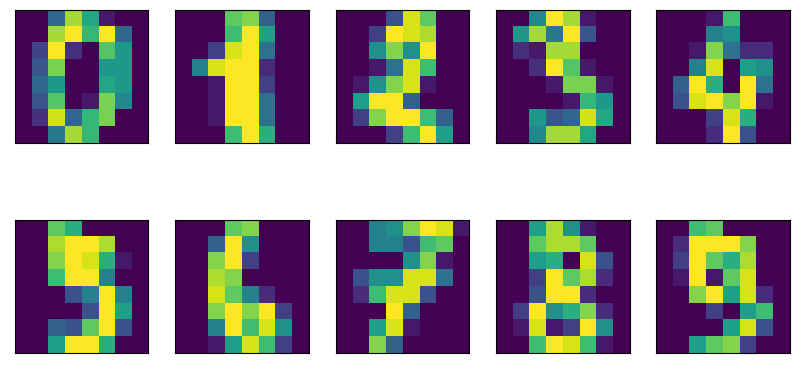

In [3]:
# number dataset sample img
from sklearn.datasets import load_digits
digit = load_digits()

fig, axes = plt.subplots(2,5,figsize=(10,5),subplot_kw={'xticks':(),'yticks':()})
for ax, img in zip(axes.ravel(),digit.images):
    ax.imshow(img)

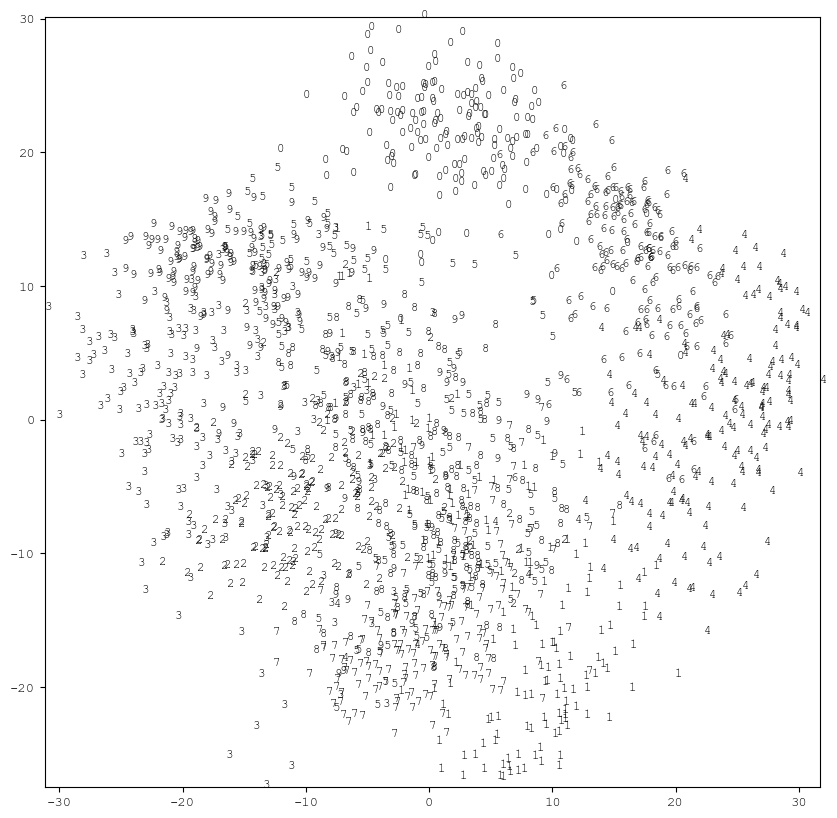

In [44]:
# using pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digit.data)

digit_pca = pca.transform(digit.data)
plt.figure(figsize=(10,10))
plt.xlim(digit_pca[:,0].min(),digit_pca[:,0].max())
plt.ylim(digit_pca[:,1].min(),digit_pca[:,1].max())

for i in range(len(digit.data)):
    plt.text(digit_pca[i,0], digit_pca[i,1], str(digit.target[i]), fontdict={'size':9})

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

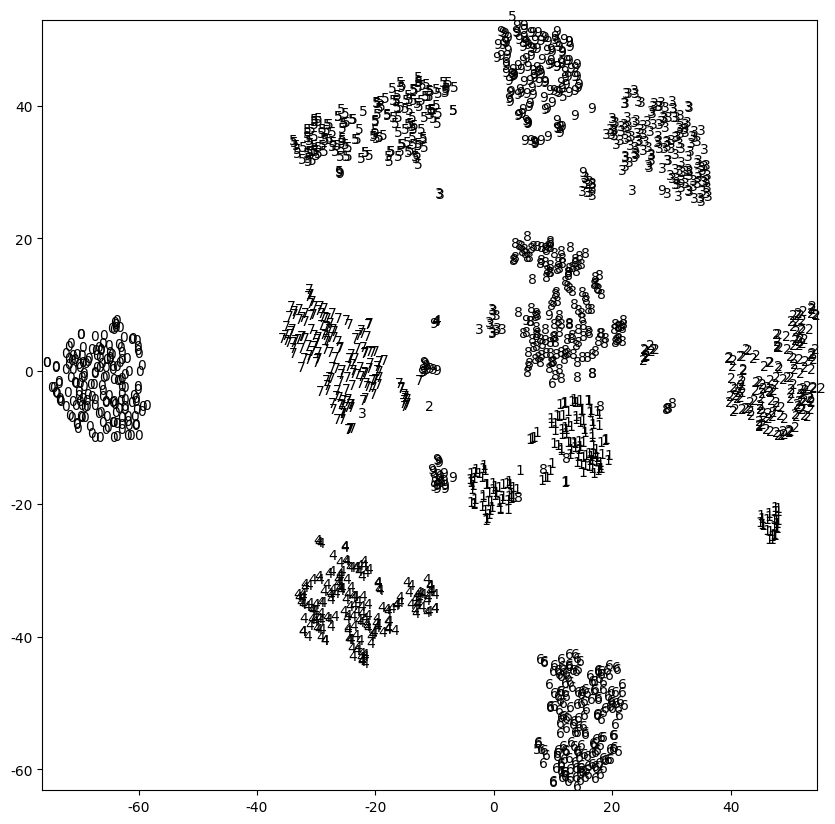

In [9]:
# using t_SNE
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

from sklearn.manifold import TSNE
tsen = TSNE(random_state=42,n_jobs=-1)
digit_tsne = tsen.fit_transform(digit.data)
plt.figure(figsize=(10,10))
plt.xlim(digit_tsne[:,0].min(),digit_tsne[:,0].max())
plt.ylim(digit_tsne[:,1].min(),digit_tsne[:,1].max())

for i in range(len(digit.data)):
    plt.text(digit_tsne[i,0],digit_tsne[i,1],str(digit.target[i]))

### Clustering

seperate dataset to cluster(grouping)

#### K-means clustering
    # 랜덤 클러스터 중심 설정 > 가장 가까운 중심에 데이터를 할당 > 데이터 평균으로 클러스터 중심 다시 지정 > 반복 > 3번 반복시에도 안바뀌면 알고리즘 종료
    # init : cluster optim way ['K_means++', 'random'] , default : 'K_means++'
    # max_iter : algorithm repeat times , default : 300
    # n_clusters : number of cluster center, default : 8

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

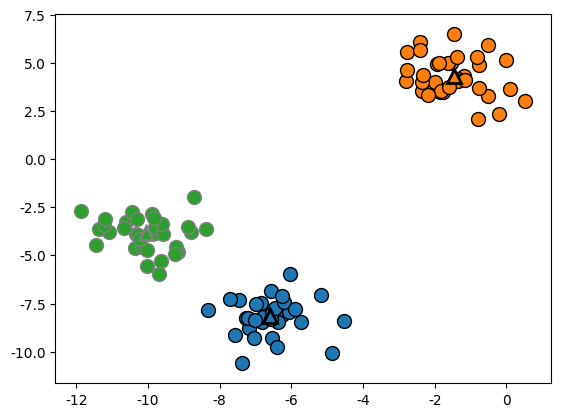

In [21]:
# K-means clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.labels_ # == kmeans.predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth=2)


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

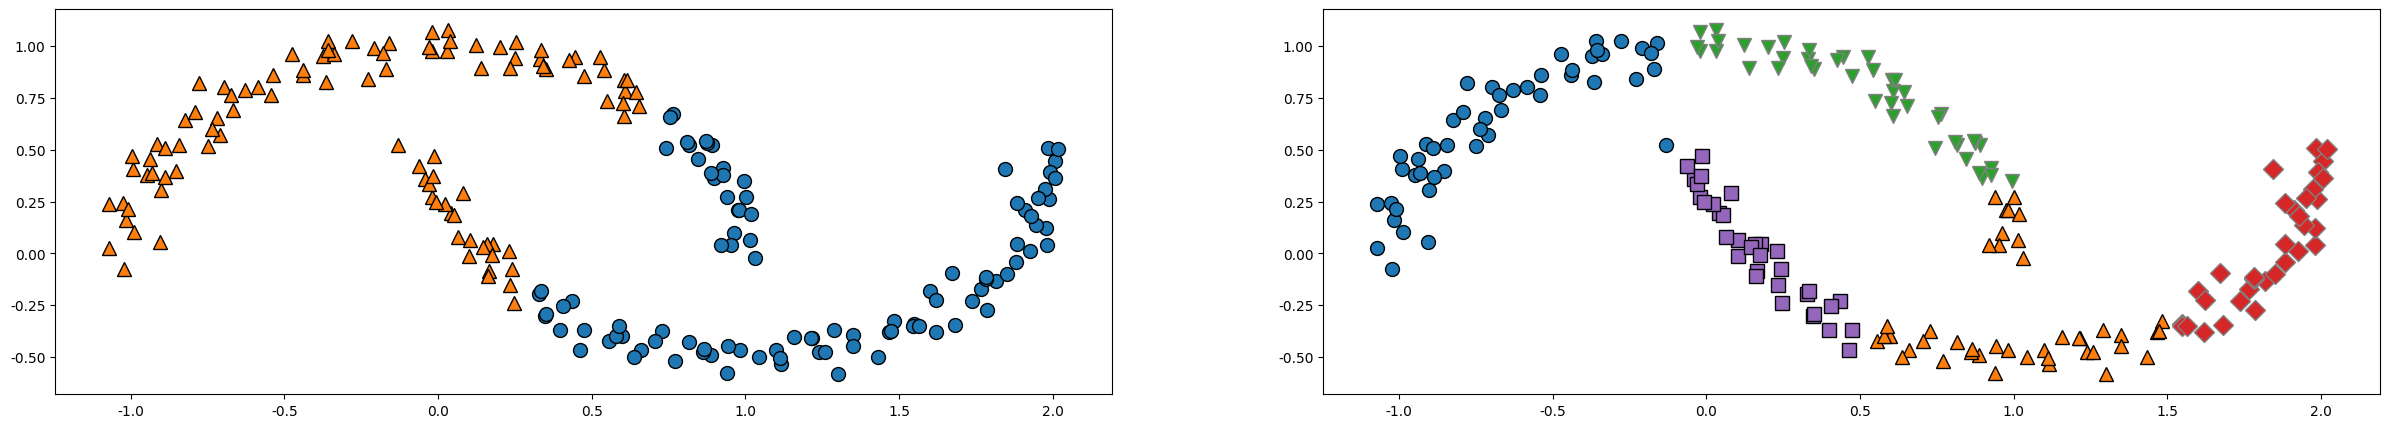

In [30]:
    # n_cluster = 2, 5
fig, axes = plt.subplots(1,2,figsize=(30,5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,ax=axes[1])

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

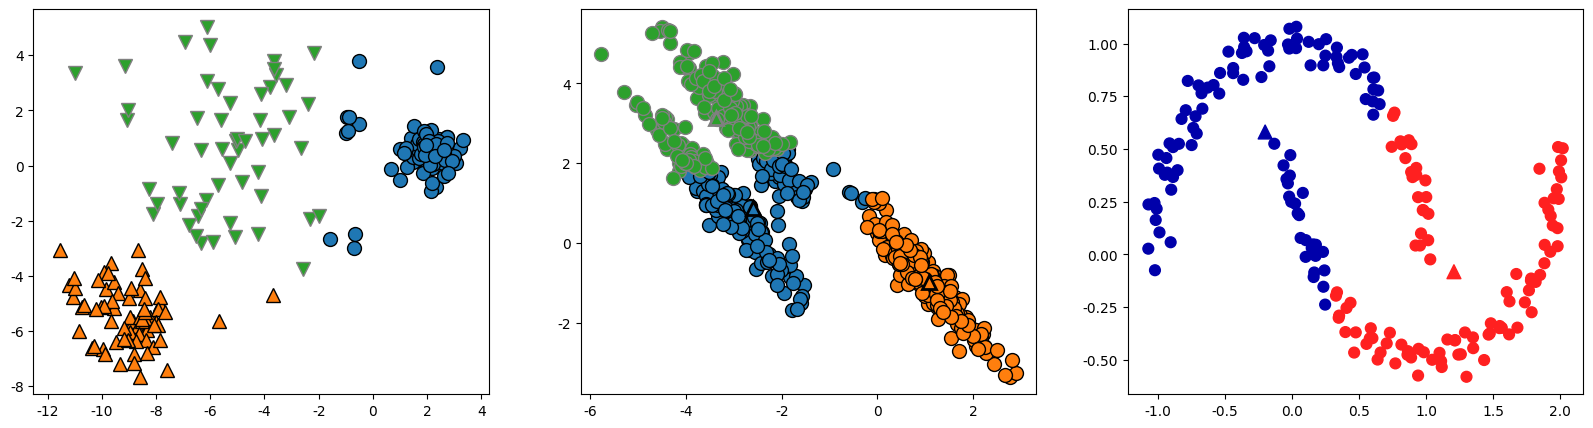

In [37]:
# 밀도가 낮거나, 데이터가 복잡하거나, 원형이 아닌경우 알고리즘이 실패할 수 있다.
fig, axes = plt.subplots(1,3,figsize=(20,5))

# 1. 클러스터의 밀도가 다를 때
X_varied , y_varied = make_blobs(n_samples=200,cluster_std=[1.0,2.5,0.5],random_state=170)

y_pred = KMeans(n_clusters=3,random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred,ax=axes[0])

# 2. 원형이 아닌 형태
X, y = make_blobs(random_state=170,n_samples=600)
rng=np.random.RandomState(74)
transformation = rng.normal(size=(2,2))
X=np.dot(X,transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],y_pred,markers='o',ax=axes[1])
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth=2,ax=axes[1])

# 3. 복잡한 모양일 때
from sklearn.datasets import make_moons
X,y= make_moons(n_samples=200, noise=.05,random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred, cmap = mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',c=[mglearn.cm2(0),mglearn.cm2(1)],s=100)

Text(0, 0.5, 'nmf')

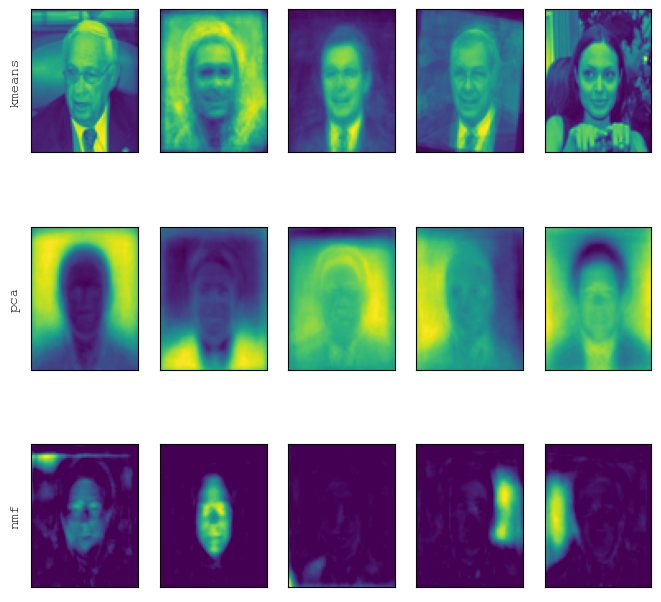

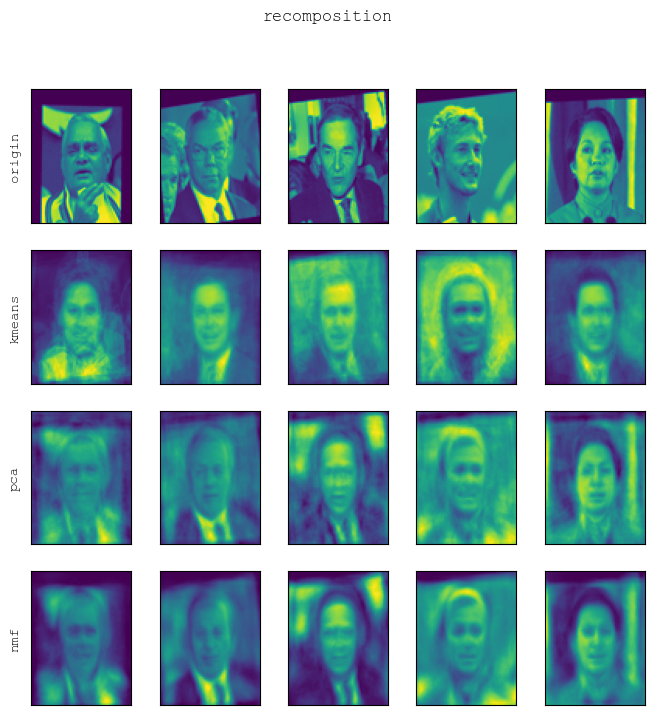

In [46]:
# decomposition method 로서의 k_means.(vector quantization)
    # 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것.
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
img_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
        # [return index]

X_people = people.data[mask]
y_people = people.target[mask]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=42)

from sklearn.decomposition import NMF
nmf = NMF(n_components=100, init = 'nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_nmf = np.dot(nmf.transform(X_test),nmf.components_)

from sklearn.decomposition import PCA
pca = PCA(n_components=100,random_state=0)
pca.fit(X_train)
X_pca = pca.inverse_transform(pca.transform(X_test))

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100,random_state=0)
kmeans.fit(X_train)
X_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

fit, axes = plt.subplots(3,5,figsize=(8,8),subplot_kw={'xticks':(),'yticks':()})
fig.suptitle('extracted feature')
for ax, comp_kmeans, comp_pca,comp_nmf in zip(axes.T,kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(img_shape))
    ax[1].imshow(comp_pca.reshape(img_shape),cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(img_shape))

axes[0,0].set_ylabel('kmeans'); axes[1,0].set_ylabel('pca'); axes[2,0].set_ylabel('nmf')

fig, axes = plt.subplots(4,5,figsize=(8,8),subplot_kw={'xticks':(),'yticks':()})
fig.suptitle('recomposition')
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_kmeans, X_pca, X_nmf):
    ax[0].imshow(orig.reshape(img_shape))
    ax[1].imshow(rec_kmeans.reshape(img_shape))
    ax[2].imshow(rec_pca.reshape(img_shape))
    ax[3].imshow(rec_nmf.reshape(img_shape))

axes[0,0].set_ylabel('origin')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf')

# k-mean을 사용한 벡터 양자화 > 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있다.

#### agglomerative clustering(병합 군집)
알고리즘 시작 시 각 포인트를 하나의 클러스터로 지정 > 종료 조건 만족시 까지 가장 비슷한 두 클러스터를 합쳐나간다.

+ 종료조건 : 클러스터 개수.

+ 비슷한 클러스터 측정 방법 : linkage : [ward, average, complete] > default : ward

    > 알고리즘 특성상 새로운 데이터 포인트 예측은 할 수 없다. == predict 메서드가 없다.


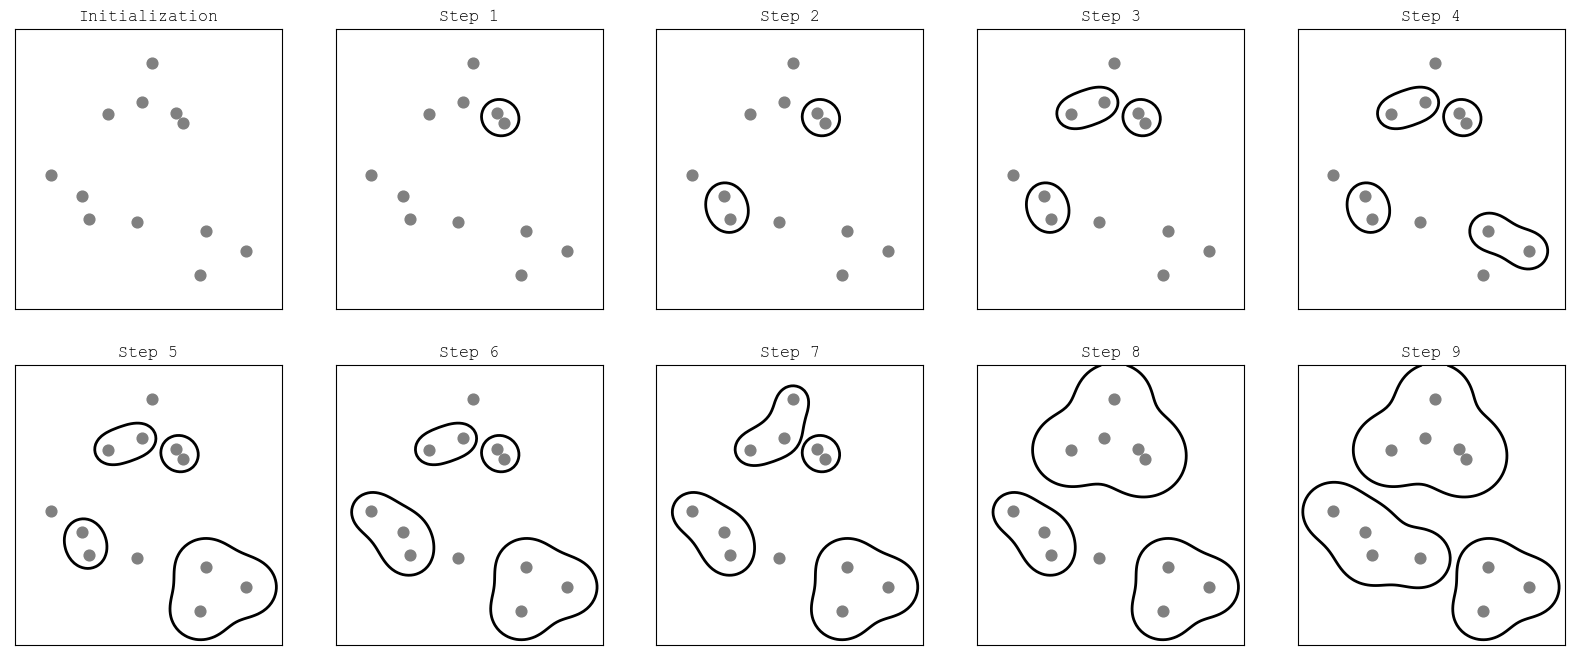

In [45]:
mglearn.plots.plot_agglomerative_algorithm()

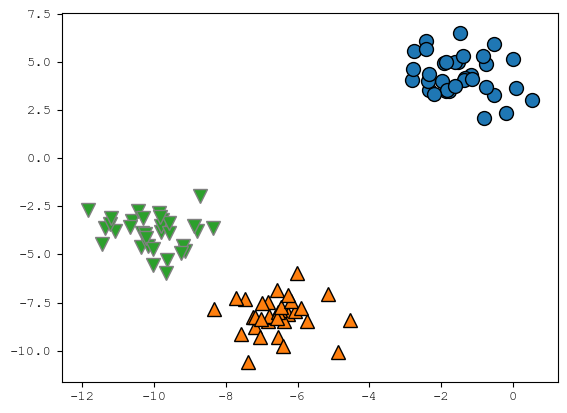

In [48]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=1)

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],assignment)

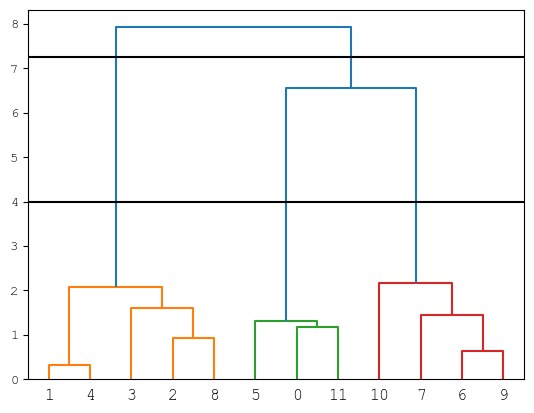

In [54]:
# hierarchical clustering(계층적 군집), dendrogram
    # 병합군집은 계층적 군집을 만든다.
mglearn.plots.plot_agglomerative()

    # 2차원 데이터 그래프로 특성이 셋 이상인 데이터에는 사용 불가.
    # 따라서 다른 계층적 군집 시각화 도구인 덴드로그램을 사용
from scipy.cluster.hierarchy import dendrogram, ward
X,y = make_blobs(random_state=0,n_samples=12)
linkage_array=ward(X)
dendrogram(linkage_array)

ax=plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds,[7.25,7.25],c='k')
ax.plot(bounds,[4,4],c='k')
    # but, 여전히 two_moons 데이터셋 같은 복잡한 형상은 구분하지 못한다.
    # > 다음 내용인 DBSCAN을 이용

#### DBSCAN
클러스터 개수를 미리 지정할 필요가 없으며, 노이즈 포인트를 구분할 수 있다.

    > 데이터가 많은 밀집지역을 찾아 eps와 min_samples 매개변수를 통해 핵심 샘플, 경계 포인트, 잡음 포인트를 나눈다.

+ eps : 거리 내 데이터가 min_samples 만큼 있으면 핵심 샘플로 분류. 적으면 잡음으로 분류. default = .5

    > 핵심 샘플로 분류시 eps 거리 내 모든 이웃을 살펴 할당 전이라면 핵심 샘플과 같은 클러스터 레이블을 할당한다.

    > 적절한 eps를 쉽게 찾기 위해서는 StandardScaler/MinMaxScaler등의 전처리가 필요하다.

+ min_samples : default = 5

+ 병합군집과 마찬가지로 새로운 테스트 데이터에 대해 예측은 불가능하다. fit_predict 사용.

cluster lable: 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


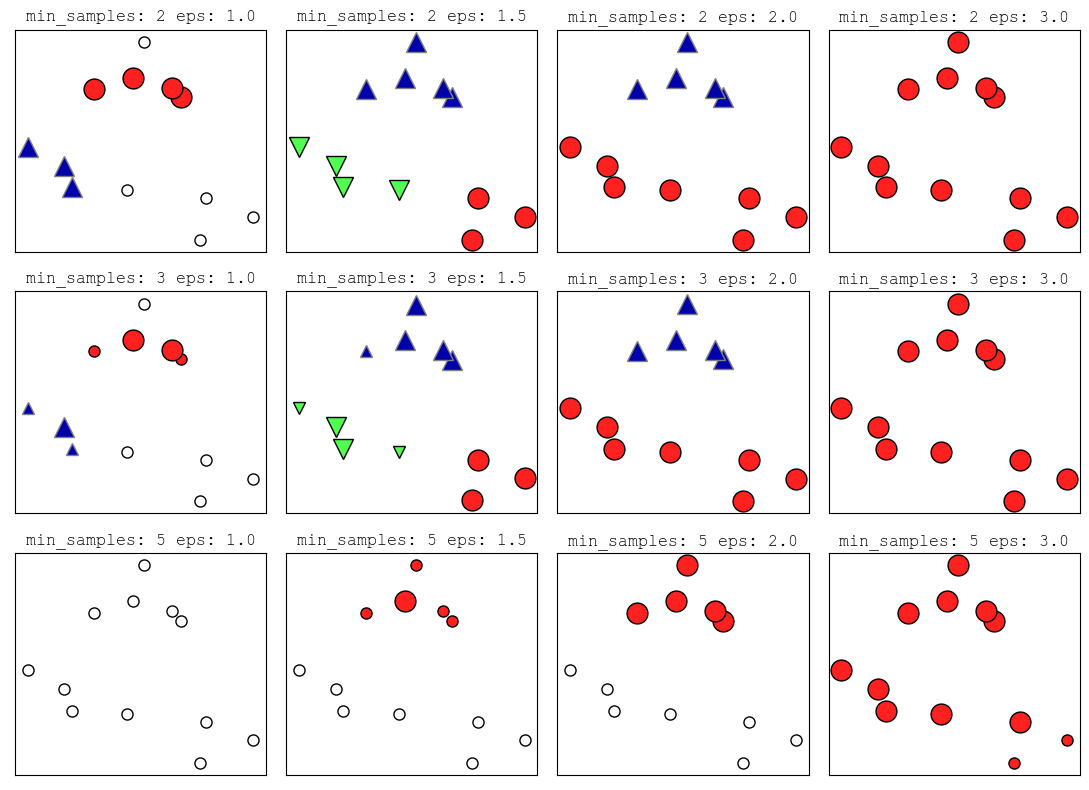

In [57]:
from sklearn.cluster import DBSCAN
X,y = make_blobs(random_state=0,n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('cluster lable: \n', clusters)
    # 모든 포인트가 잡음 포인트를 의미하는 -1이 되었음. 작은 샘플 데이터에 적합하지 않은 eps, min_samples를 바꿔주자.

mglearn.plots.plot_dbscan()

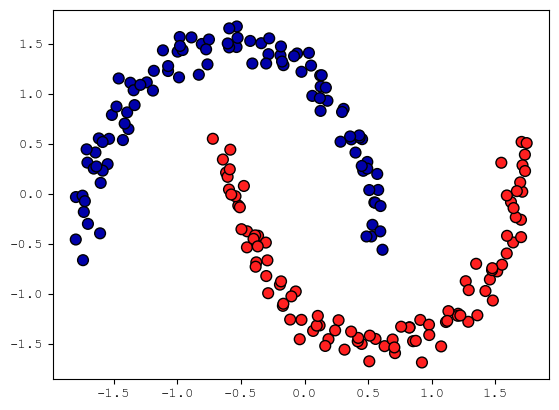

In [59]:
X,y=make_moons(n_samples=200,random_state=0,noise=.05)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.cluster import DBSCAN
db = DBSCAN()
clusters = db.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters, cmap=mglearn.cm2,s=60,edgecolors='black')
    # 클러스터 할당 표시

### 군집 알고리즘의 비교와 평가
+ 군집 알고리즘의 적용이 어려운 이유는 평가와 출력 비교가 매우 어렵기 때문이다.

    > 평가 지표인 ARI, NMI로 k평균, 병합 군집, DBSCAN 알고리즘을 비교해본다.

    > ARI, NMI : 1(최적)~0(무작위) 사이의 값을 가지며, ARI는 음수가 될 수 있다. - 무작위 할당보다 나쁘게 군집될때

+ 보통의 군집 알고리즘은 타깃 값을 갖지 않는다.(y value) 따라서 실제로는 타깃값이 필요하지 않은 지표인 silhouette coefficient를 사용한다.

    > 클러스터의 밀집 정도를 계산한 것으로, 높을수록 좋으며 최대 1의 값을 갖는다.

    > 0은 중첩된 클러스터, -1은 잘못된 군집을 뜻 한다.

    > 하지만 이도 복잡한 모양의 데이터셋에서는 잘 작동하지 않는다.

+ 결국 클러스터 평가에 가장 적합한 전략은 견고성 기반(robustness-based)의 지표이다.

    > 잡음 포인트 추가, 여러 가지 매개변수 설정으로 알고리즘 실행 후 결과 비교.

C:\Users\rjsgh\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from current font.
  func(*args, **kwargs)
C:\Users\rjsgh\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\rjsgh\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rjsgh\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


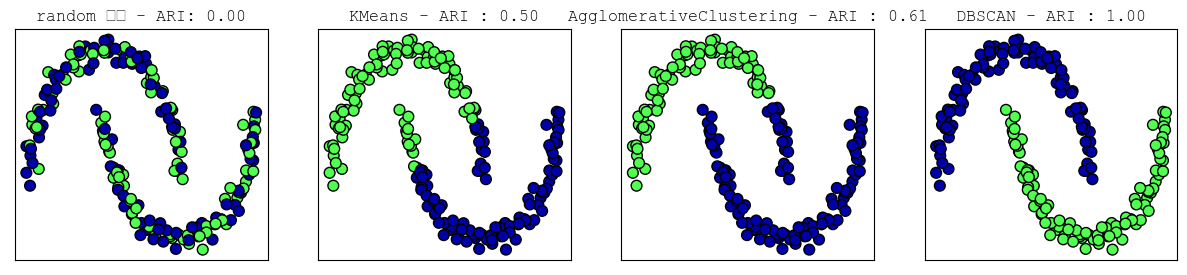

In [4]:
# 타깃 값으로 군집 평가

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200,noise=.05,random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(1,4,figsize=(15,3),subplot_kw={'xticks':(),'yticks':()})

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0,high=2,size=len(X))
    # random cluster 할당(label) - 0 or 1 할당

axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters, cmap =mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('random 할당 - ARI: {:.2f}'.format(adjusted_rand_score(y,random_clusters)))
    # random 할당 cluster 그리기

for ax, algorithms in zip (axes[1:],algorithms):
    # 클러스터 할당과 클러스터 중심 그리기
    clusters = algorithms.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60,edgecolor='black')
    ax.set_title('{} - ARI : {:.2f}'.format(algorithms.__class__.__name__,adjusted_rand_score(y,clusters)))


C:\Users\rjsgh\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from current font.
  func(*args, **kwargs)
C:\Users\rjsgh\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\rjsgh\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rjsgh\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


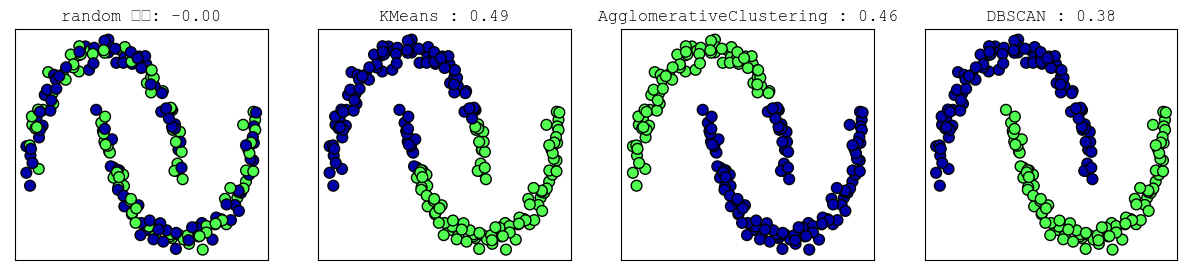

In [15]:
# 타깃 값 없이 군집 평가
from sklearn.metrics.cluster import silhouette_score

X,y = make_moons(n_samples=200,noise=.05,random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(1,4,figsize=(15,3),subplot_kw={'xticks':(),'yticks':()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(0,2,len(X))

axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3,s=60,edgecolors='black')
axes[0].set_title('random 할당: {:.2f}'.format(silhouette_score(X_scaled,random_clusters)))

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]


for ax, algorithms in zip(axes[1:],algorithms):
    clusters = algorithms.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60,edgecolor='black')
    ax.set_title('{} : {:.2f}'.format(algorithms.__class__.__name__, silhouette_score(X_scaled,clusters)))

# DBSCABN의 결과가 누가봐도 좋지만, KMeans가 더 잘나온 모습 > 제대로 작동하지 않는다

#### 얼굴 데이터셋으로 군집 알고리즘 비교

unique label: [-1  0]
point of each cluster: [  12 2051]


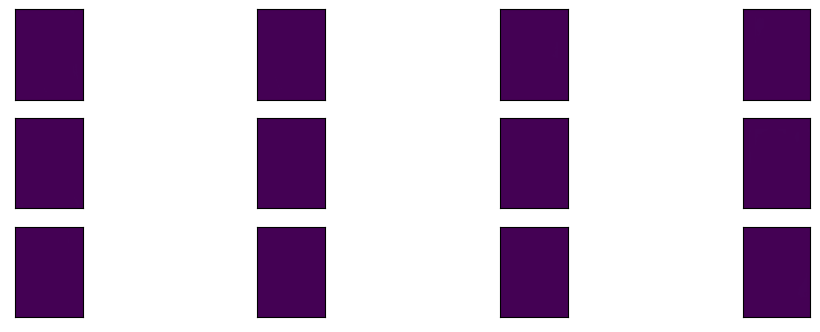

In [42]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) # default : color = False
img_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
        # [return index]

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people/255.

from sklearn.decomposition import PCA
pca= PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print('unique label:',np.unique(labels))
print('point of each cluster:', np.bincount(labels+1))
    # noise 12개. 직접 확인해 본다.

noise = X_people[labels==-1]

fig, axes = plt.subplots(3,4,figsize=(12,4),subplot_kw={'xticks':(),'yticks':()})
for img, ax in zip(noise, axes.ravel()):
    ax.imshow(img.reshape(img_shape),vmin=0,vmax=1)

In [53]:
dbscan = DBSCAN(min_samples=3,eps=7)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels)+1):
    mask = labels == cluster
    print(mask, mask.shape)
    n_images = np.sum(mask)
    print(n_images)

[False False False ... False False False] (2063,)
151
